# Help

The notebook retrives the data from the Un Com Trade and prepares the data for ready analysis. The parameters in the next cell can be changed and the notebook can be run again to get updated results. The code paramaters can be located using the links.

* Reporter Area (r): https://comtrade.un.org/Data/cache/reporterAreas.json
* Partner Area (p): https://comtrade.un.org/Data/cache/partnerAreas.json
* Frequency (freq): Monthly - M, Annual - A
* Period (ps) : Annual (YYYY) - 2019, Monthly (YYYY or YYYYMM): Individual periods as 201001 or full years as 2010, automatically expands to query periods 201001,201002,201003,...,201012.
* Classification (px): HS
* Regime (rg) : [{'id': '1', 'text': 'Import'}, {'id': '2', 'text': 'Export'}, {'id': '3', 'text': 're-Export'}, {'id': '4', 'text': 're-Import'}]
* Classification Code (cc): a commodity code valid in the selected classification. Full lists of codes for each classification are linked to above under the px parameter. Some codes are valid in all classifications - 
TOTAL Total trade between reporter and partner, no detail breakdown. AG1, AG2, AG3, AG4, AG5, AG6 Detailed codes at a specific digit level. For instance AG6 in HS gives all of the 6-digit codes, which are the most detailed codes that are internationally comparable. Not all classifications have all digit levels available.  ALL All codes in the classification.

**a series is reporter data, b series is partner data**

**Make change to other cell at your own discretion. A wrong change will break the application. When making change in the next cell, please make sure the value is enclosed by single quote. When data is pulled you can see the parameters which are used to full data**

In [1]:
# Reporter
reporter = '699' # India
# Partner
partner = 'ALL' # All
# Period
period = '2019' # Annual
# Classification Code
cc = '710813'

# Initialisation

In [2]:
import os
import sys
sys.path.append("../..") 
ROOT_DIR = '/home/jovyan/tta'

import pandas as pd
import matplotlib.pyplot as plt
pd.set_option('display.max_rows', 5000)
plt.rcParams['figure.figsize'] = [20, 10]

from comtrade.analysis import Analysis
tta = Analysis()

# Available

In [3]:
status = tta.data_available(reporter, 201912, 'HS', 'M')
print(status)
status = tta.data_available(partner, 201912, 'HS', 'M')
print(status)

[{'type': 'COMMODITIES', 'freq': 'MONTHLY', 'px': 'HS', 'r': '699', 'rDesc': 'India', 'ps': '201912', 'TotalRecords': 251502, 'isOriginal': 1, 'publicationDate': '2020-03-02T00:00:00', 'isPartnerDetail': 1}]
[{'type': 'COMMODITIES', 'freq': 'MONTHLY', 'px': 'HS', 'r': '440', 'rDesc': 'Lithuania', 'ps': '201912', 'TotalRecords': 123604, 'isOriginal': 1, 'publicationDate': '2020-07-17T00:00:00', 'isPartnerDetail': 1}, {'type': 'COMMODITIES', 'freq': 'MONTHLY', 'px': 'HS', 'r': '757', 'rDesc': 'Switzerland', 'ps': '201912', 'TotalRecords': 230203, 'isOriginal': 1, 'publicationDate': '2020-02-05T00:00:00', 'isPartnerDetail': 1}, {'type': 'COMMODITIES', 'freq': 'MONTHLY', 'px': 'HS', 'r': '616', 'rDesc': 'Poland', 'ps': '201912', 'TotalRecords': 256285, 'isOriginal': 1, 'publicationDate': '2020-02-22T00:00:00', 'isPartnerDetail': 1}, {'type': 'COMMODITIES', 'freq': 'MONTHLY', 'px': 'HS', 'r': '191', 'rDesc': 'Croatia', 'ps': '201912', 'TotalRecords': 109405, 'isOriginal': 1, 'publicationDat

# Data

In [4]:
data_in, data_out = tta.get_import_data(reporter, partner, period, cc)
data = tta.compare(data_in, data_out, 'pt3ISO', 'rt3ISO')
df = tta.prepare(data)

{'r': '699', 'p': 'ALL', 'rg': 1, 'ps': '2019', 'px': 'HS', 'cc': '710813', 'freq': 'A', 'max': '100000'}
{'r': 'ALL', 'p': '699', 'rg': 2, 'ps': '2019', 'px': 'HS', 'cc': '710813', 'freq': 'A', 'max': '100000'}


In [5]:
df['iso'] = df.index
df.sort_values(by=['value_diff_abs'])

,code,desc,quantity_a,quantity_desc_a,value_a,quantity_b,quantity_desc_b,value_b,value_diff,quantity_diff,quantity_pct,value_pct,value_diff_abs,value_pct_abs,iso
CAN,710813,"Metals; gold, semi-manufactured",0,Weight in kilograms,0.00,0,Weight in kilograms,0.00,0.00,0,NaN,NaN,0.00,NaN,CAN
AUT,710813,"Metals; gold, semi-manufactured",0,Weight in kilograms,0.00,0,Weight in kilograms,0.00,0.00,0,NaN,NaN,0.00,NaN,AUT
KOR,710813,"Metals; gold, semi-manufactured",2,Weight in kilograms,0.05,0,Weight in kilograms,0.06,-0.01,2,100.000000,-20.000000,0.01,20.000000,KOR
BEL,710813,"Metals; gold, semi-manufactured",0,Weight in kilograms,0.00,1,Weight in kilograms,0.06,-0.06,-1,-inf,-inf,0.06,inf,BEL
ESP,710813,"Metals; gold, semi-manufactured",93,Weight in kilograms,3.89,100,Weight in kilograms,3.96,-0.07,-7,-7.526882,-1.799486,0.07,1.799486,ESP
JPN,710813,"Metals; gold, semi-manufactured",2,Weight in kilograms,0.11,0,Weight in kilograms,0.00,0.11,2,100.000000,100.000000,0.11,100.000000,JPN
ARE,710813,"Metals; gold, semi-manufactured",41,Weight in kilograms,1.86,41,Weight in kilograms,1.65,0.21,0,0.000000,11.290323,0.21,11.290323,ARE
THA,710813,"Metals; gold, semi-manufactured",0,Weight in kilograms,0.00,10,Weight in kilograms,0.39,-0.39,-10,-inf,-inf,0.39,inf,THA
FRA,710813,"Metals; gold, semi-manufactured",11,Weight in kilograms,0.51,3,Weight in kilograms,0.00,0.51,8,72.727273,100.000000,0.51,100.000000,FRA
DEU,710813,"Metals; gold, semi-manufactured",154,Weight in kilograms,4.01,147,Weight in kilograms,3.41,0.60,7,4.545455,14.962594,0.60,14.962594,DEU


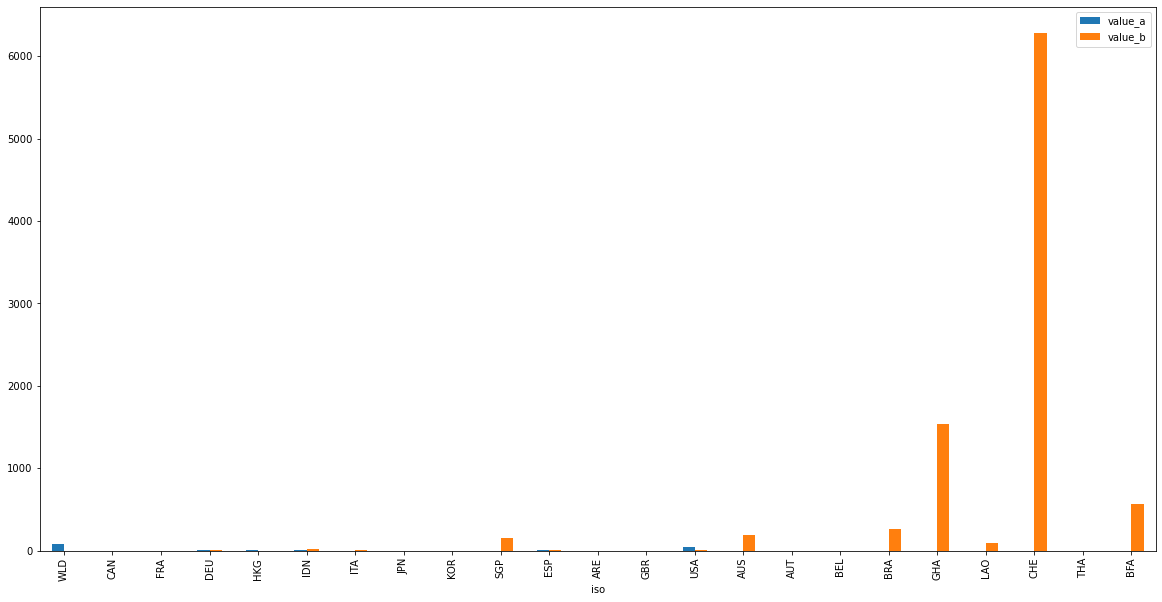

In [6]:
df.plot(kind='bar', y=['value_a','value_b'], x='iso')
plt.show()

## Aggregate

In [7]:
print("Total export, as per reporter data:", df['value_a'].sum(), " million USD.")
print("Total import, as per partner data:", df['value_b'].sum(), " million USD.")


Total export, as per reporter data: 158.66  million USD.
Total import, as per partner data: 9120.88  million USD.


## Filter
Remove data where the value difference is less than 10 million and percentage difference is less than 10%

In [8]:
percentage_cutoff = 10 # value to filter
value_diff_cutoff = 10 # value to filter
dfi = df[(df['value_pct_abs'] > percentage_cutoff) & (df['value_diff_abs'] > value_diff_cutoff)]
dfi.sort_values(by=['value_diff_abs'])

,code,desc,quantity_a,quantity_desc_a,value_a,quantity_b,quantity_desc_b,value_b,value_diff,quantity_diff,quantity_pct,value_pct,value_diff_abs,value_pct_abs,iso
USA,710813,"Metals; gold, semi-manufactured",1124,Weight in kilograms,47.73,315,Weight in kilograms,7.15,40.58,809,71.975089,85.019904,40.58,85.019904,USA
WLD,710813,"Metals; gold, semi-manufactured",1925,Weight in kilograms,79.34,0,Weight in kilograms,0.00,79.34,1925,100.000000,100.000000,79.34,100.000000,WLD
LAO,710813,"Metals; gold, semi-manufactured",0,Weight in kilograms,0.00,18076,Weight in kilograms,89.35,-89.35,-18076,-inf,-inf,89.35,inf,LAO
SGP,710813,"Metals; gold, semi-manufactured",35,Weight in kilograms,1.67,3431,Weight in kilograms,155.75,-154.08,-3396,-9702.857143,-9226.347305,154.08,9226.347305,SGP
AUS,710813,"Metals; gold, semi-manufactured",0,Weight in kilograms,0.00,4283,Weight in kilograms,185.71,-185.71,-4283,-inf,-inf,185.71,inf,AUS
BRA,710813,"Metals; gold, semi-manufactured",0,Weight in kilograms,0.00,6704,Weight in kilograms,260.31,-260.31,-6704,-inf,-inf,260.31,inf,BRA
BFA,710813,"Metals; gold, semi-manufactured",0,Weight in kilograms,0.00,13318,Weight in kilograms,563.66,-563.66,-13318,-inf,-inf,563.66,inf,BFA
GHA,710813,"Metals; gold, semi-manufactured",0,Weight in kilograms,0.00,38773,Weight in kilograms,1537.62,-1537.62,-38773,-inf,-inf,1537.62,inf,GHA
CHE,710813,"Metals; gold, semi-manufactured",0,Weight in kilograms,0.00,152551,Weight in kilograms,6283.28,-6283.28,-152551,-inf,-inf,6283.28,inf,CHE


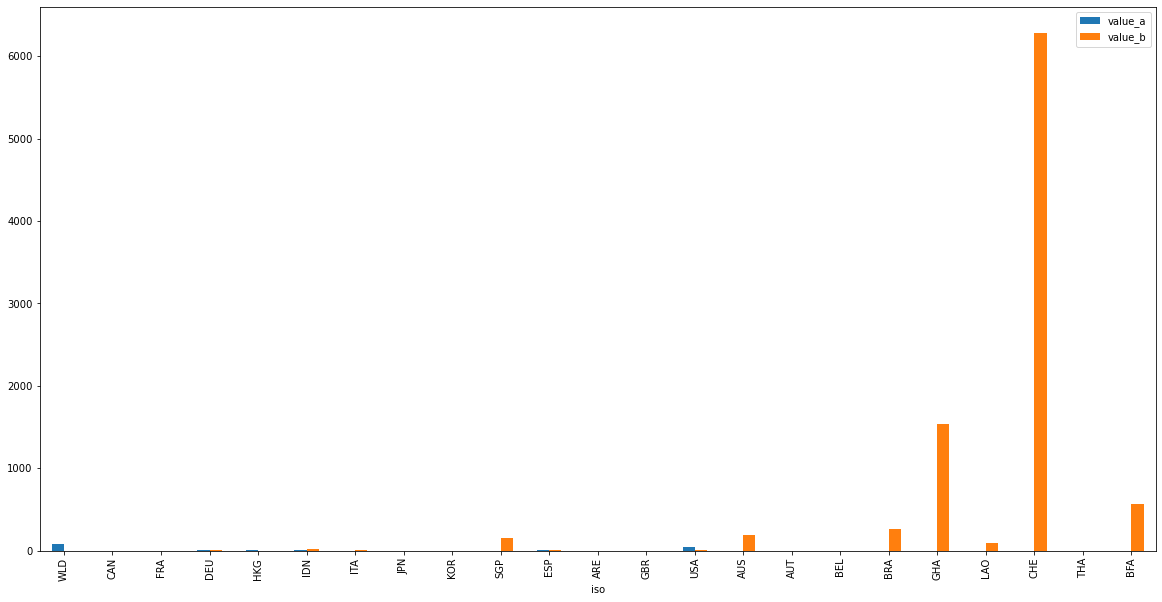

In [9]:
df.plot(kind='bar', y=['value_a','value_b'], x='iso')
plt.show()